In [22]:
import numpy as np
import pandas as pd
from seaborn import heatmap
import matplotlib.pyplot as plt
from sklearn import datasets

In [23]:
data = pd.DataFrame(datasets.load_iris().data,columns=datasets.load_iris().feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
data['target'] = datasets.load_iris().target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
target_names = datasets.load_iris().target_names
data['target'] = [target_names[i] for i in data['target']]
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [26]:
del target_names

In [27]:
tmp = {'setosa':0,'versicolor':1,'virginica':2}
data['target'] = data['target'].map(tmp)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [28]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [29]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [30]:
data.isin(['',' ','-']).sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['target']),data['target'],
                                                   test_size=0.2,random_state=33)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

results = pd.DataFrame(
    {'Actual':y_test,
    'Predicted':y_pred}
)
results

,Actual,Predicted
96,1,1
65,1,1
29,0,0
54,1,1
134,2,1
100,2,2
24,0,0
17,0,0
137,2,2
120,2,2


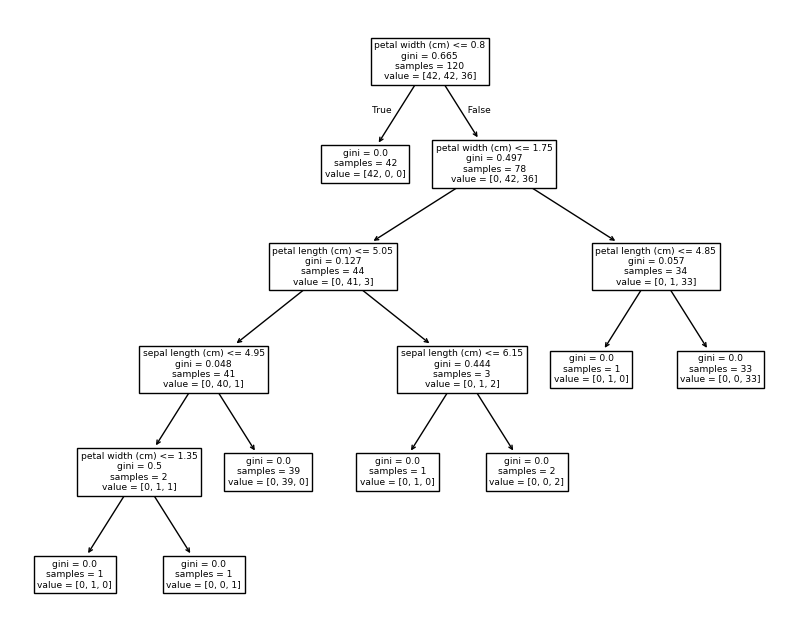

In [33]:
plt.figure(figsize=(10,8))
tree.plot_tree(model,feature_names=data.columns)
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix

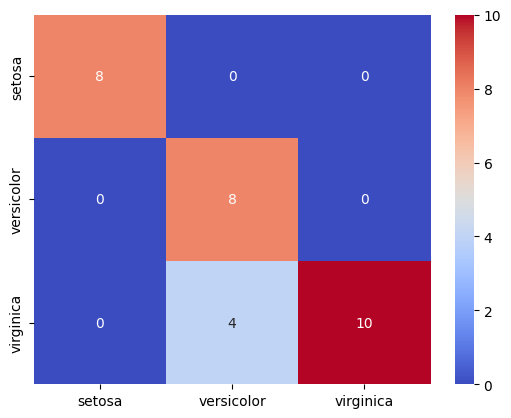

In [35]:
cm = confusion_matrix(y_test,y_pred)
labels = ['setosa','versicolor','virginica']
heatmap(cm,annot=True,cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.show()

In [36]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [37]:
y_pred

array([1, 1, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 1, 2, 0, 0,
       2, 0, 1, 1, 1, 1, 2, 2], dtype=int64)

In [38]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred,average='macro')
recall = recall_score(y_test,y_pred,average='macro')
f1 = f1_score(y_test,y_pred,average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

Accuracy: 0.8666666666666667
Precision: 0.8888888888888888
Recall: 0.9047619047619048
F1: 0.8777777777777778


In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_values = np.arange(1, 101, 1)
param_grid = {'max_depth': param_values}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(data.drop(columns=['target']), data['target'])
print("Best depth:", grid_search.best_params_)

Best depth: {'max_depth': 4}


In [41]:
model2 = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'])
model2.fit(X_train,y_train)

y_pred2 = model2.predict(X_test)

results2 = pd.DataFrame(
    {'Actual':y_test,
    'Predicted':y_pred2}
)
results2

,Actual,Predicted
96,1,1
65,1,1
29,0,0
54,1,1
134,2,1
100,2,2
24,0,0
17,0,0
137,2,2
120,2,2
